In [21]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (10, 10)})

In [22]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'

df = pd.read_csv(url, header=None, names=['year','transistors'])

In [23]:
df.head()

,year,transistors
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


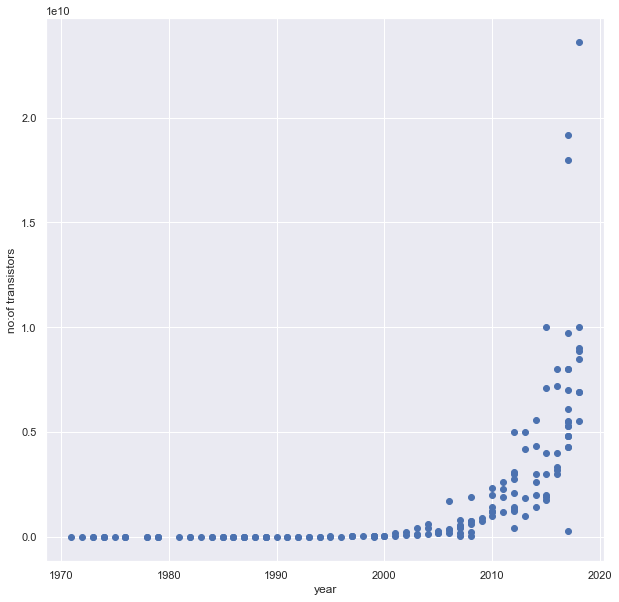

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(df.year, df.transistors)
plt.xlabel('year')
plt.ylabel('no:of transistors')
plt.grid(True)

In [25]:
df.groupby('year')['year'].count()

year
1971     1
1972     1
1973     2
1974     3
1975     1
1976     3
1978     2
1979     3
1981     1
1982     2
1983     1
1984     2
1985     3
1986     3
1987     4
1988     2
1989     4
1990     1
1991     2
1992     2
1993     2
1994     2
1995     2
1996     1
1997     3
1998     1
1999     6
2000     3
2001     2
2002     2
2003     3
2004     3
2005     4
2006     4
2007     6
2008     6
2009     2
2010     6
2011     4
2012     9
2013     4
2014     6
2015     7
2016     6
2017    17
2018     8
Name: year, dtype: int64

In [26]:
df[df.year==2017]

,year,transistors
123,2017,5300000000
124,2017,5300000000
131,2017,4300000000
133,2017,4800000000
134,2017,4800000000
135,2017,4800000000
139,2017,6100000000
143,2017,5500000000
145,2017,7000000000
147,2017,8000000000


In [27]:
# since we are about to perform linear regression it makes sense to have
# all the values in log
x = np.array(df.year)
y = np.log(df.transistors)

In [28]:
print(x.shape)
print(y.shape)


(162,)
(162,)


Text(0, 0.5, 'no: of transistors')

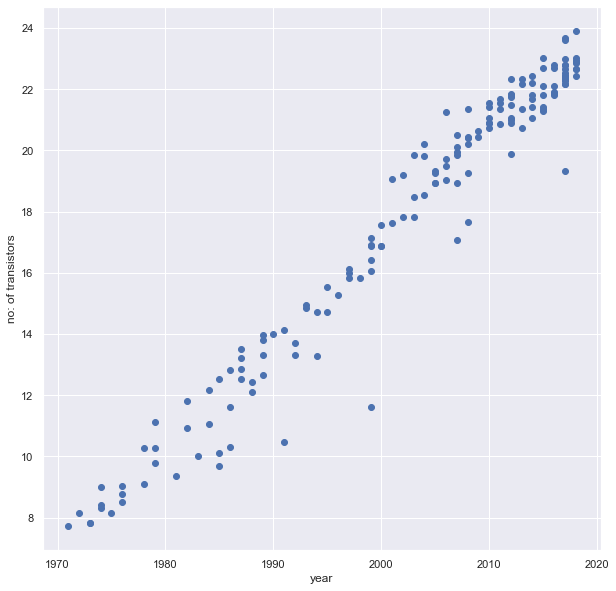

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('year')
plt.ylabel('no: of transistors')

In [30]:
# we will also pre process the year column by center it around the
# mean of the data
x = x- x.mean()

Text(0, 0.5, 'no: of transistors')

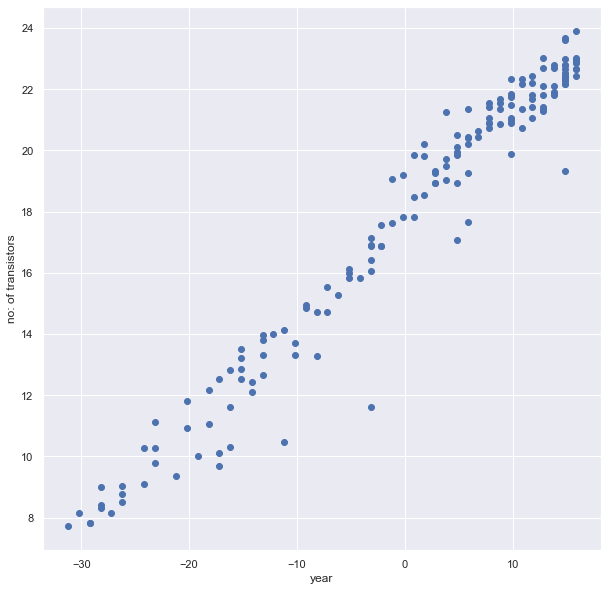

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('year')
plt.ylabel('no: of transistors')


In [32]:
# instantiating a model
try:
    del model
except:
    pass

model = tf.keras.Sequential()

# create the layers
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')

# fitting the model
mo = model.fit(x,y, epochs=100, verbose=False)

# loss without scheduler and callback
loss_without_scheduler = mo.history.get('loss')

In [33]:
# we will add a scheduler to modify the learning rate during each iteration
try:
    del model_with_schedule
except:
    pass

def schedule(epoch, lr):
    if epoch > 50:
        return 0.0001
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=schedule)

model_with_schedule = tf.keras.Sequential()

model_with_schedule.add(tf.keras.layers.Dense(1, input_shape=(1,)))

model_with_schedule.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(0.001,0.9))

mo_with_schedule = model_with_schedule.fit(x, y, epochs=100, callbacks=[scheduler],verbose=False)

loss_with_scheduler = mo_with_schedule.history.get('loss')

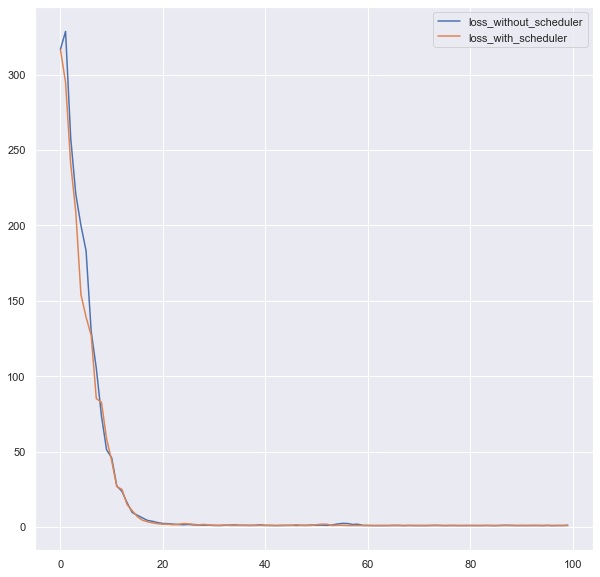

In [35]:
plt.plot(loss_without_scheduler, label='loss_without_scheduler')
plt.plot(loss_with_scheduler, label='loss_with_scheduler')
plt.legend()

In [37]:
# if we want ot get the weights of a specific layer we can use this
print(model_with_schedule.layers)
w,b = model_with_schedule.layers[0].get_weights()

In [39]:
w = w.flatten()
b = b.flatten()

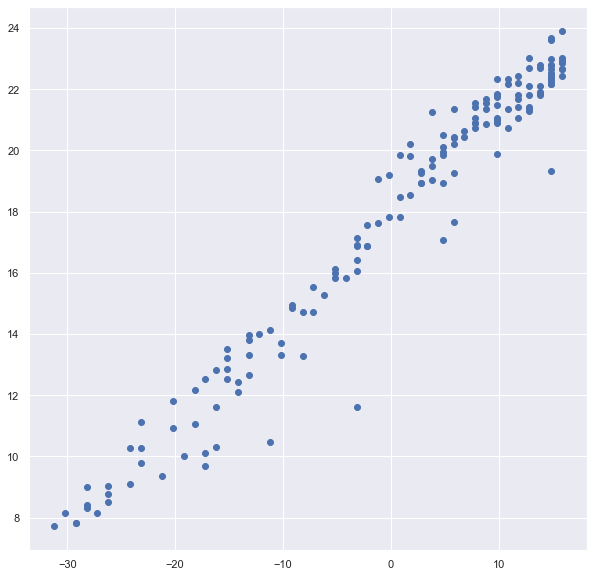

In [44]:
y_hat = (x*w)+b

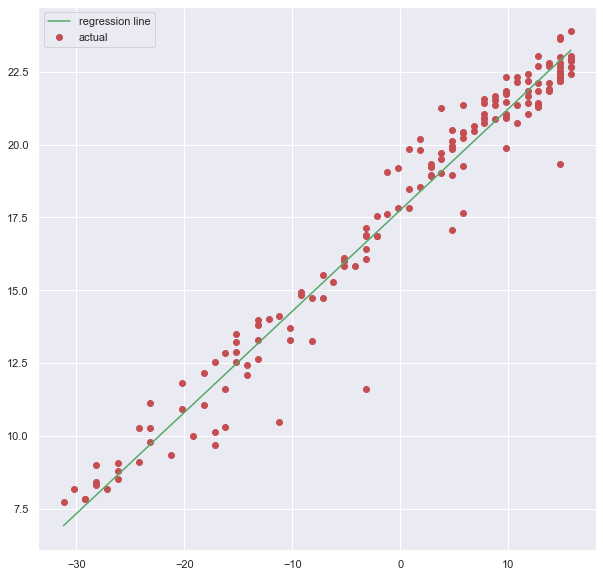

In [49]:
plt.scatter(x,y,label='actual',c='r')
plt.plot(x,y_hat, label='regression line', c='g')
plt.legend()

In [61]:
# saving the model
import os

save_here = os.path.abspath(os.path.join('e:\\repos\\udemy_deep_learning\\', 'models'))

model.save(os.path.join(save_here, 'linear_regression_tensor_flow.h5'))

[array([[0.36980653]], dtype=float32), array([17.75869], dtype=float32)]